In [16]:
import gensim
import pandas as pd
import re
import numpy as np
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.manifold import TSNE

In [17]:
#Import Dataset And Choose The Comment Body
data = pd.read_csv("2014.csv",nrows = 10000)
data=pd.DataFrame(data,columns=['body'])
data

,body
0,One of us\n\nOne of us\n\nOne of us
1,I wasn't thinking straight. I was blacked out ...
2,Yeah I tend to over do xanax and adderal at ti...
3,I don't think the whole 'addictive personality...
4,Yep pretty much. Up to long on Adderal turned ...
...,...
9995,"“Sometimes, I think I should just run away. Bu..."
9996,I basically put those in that cup after i used...
9997,Behold!\n\nhttps://www.butrans.com/\n\nIt come...
9998,Like I said with someone else... When you're d...


In [18]:
#Drop Null Value
data.dropna()

,body
0,One of us\n\nOne of us\n\nOne of us
1,I wasn't thinking straight. I was blacked out ...
2,Yeah I tend to over do xanax and adderal at ti...
3,I don't think the whole 'addictive personality...
4,Yep pretty much. Up to long on Adderal turned ...
...,...
9995,"“Sometimes, I think I should just run away. Bu..."
9996,I basically put those in that cup after i used...
9997,Behold!\n\nhttps://www.butrans.com/\n\nIt come...
9998,Like I said with someone else... When you're d...


In [19]:
#Elimate ppercase letter, punctuation,emoji and extra spaces.
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'[^\w\s]','', text)  # Remove punctuation and emoji
    text = " ".join(text.split())  # Remove extra spaces, tabs, and new lines
    return text

data=pd.DataFrame(data['body'].map(preprocess_text))
#Drop the deleted value
data=data[ data['body'].str.contains( 'deleted' )==False ]
data.reset_index(drop=True, inplace= True)
data

,body
0,one of us one of us one of us
1,i wasnt thinking straight i was blacked out on...
2,yeah i tend to over do xanax and adderal at ti...
3,i dont think the whole addictive personality t...
4,yep pretty much up to long on adderal turned m...
...,...
9198,sometimes i think i should just run away but w...
9199,i basically put those in that cup after i used...
9200,behold httpswwwbutranscom it comes in 5mcg 10m...
9201,like i said with someone else when youre deali...


In [20]:
#Create  CORPUS
wordlist = data['body']
newlist=[]
for w in range(0,len(wordlist)-1):
    newlist.append(wordlist[w].split())

In [21]:
#Create Word2Vec Model
model = Word2Vec(sentences=newlist, window=4, min_count=1, workers=4)

In [22]:
print(model)
model.save('model.bin')

Word2Vec(vocab=17446, vector_size=100, alpha=0.025)


In [23]:
#General View Of The Model
model.wv.index_to_key

['i',
 'the',
 'to',
 'a',
 'and',
 'you',
 'it',
 'of',
 'that',
 'in',
 'is',
 'for',
 'my',
 'but',
 'on',
 'was',
 'just',
 'have',
 'with',
 'if',
 'me',
 'be',
 'like',
 'so',
 'this',
 'im',
 'not',
 'your',
 'its',
 'get',
 'or',
 'are',
 'up',
 'as',
 'they',
 'dont',
 'all',
 'out',
 'do',
 'at',
 'about',
 'what',
 'can',
 'when',
 'would',
 'he',
 'from',
 'some',
 'know',
 'them',
 'had',
 'no',
 'one',
 'really',
 'ive',
 'time',
 'good',
 'there',
 'an',
 'shit',
 'people',
 'think',
 'more',
 'then',
 'how',
 'will',
 'got',
 'much',
 'even',
 'thats',
 'only',
 'because',
 'never',
 'youre',
 'been',
 'take',
 'now',
 'day',
 'than',
 'way',
 'too',
 'go',
 'dope',
 'feel',
 'well',
 'high',
 'going',
 'make',
 'off',
 'back',
 'use',
 'could',
 'were',
 'we',
 'lol',
 'any',
 'here',
 'also',
 'right',
 'did',
 'still',
 'want',
 'being',
 'man',
 'him',
 'though',
 'by',
 'didnt',
 'sure',
 'after',
 'her',
 'has',
 'she',
 'into',
 'yeah',
 'his',
 'cant',
 'who',
 

In [24]:
model.wv.get_normed_vectors()

array([[-0.0431377 ,  0.01693768,  0.10510083, ..., -0.11321145,
        -0.05469585,  0.07810095],
       [-0.16883105,  0.1203578 ,  0.00210336, ..., -0.06704473,
        -0.0258253 , -0.00871478],
       [-0.03103714,  0.01249013, -0.0743558 , ..., -0.02423745,
        -0.00060666, -0.12863435],
       ...,
       [-0.01746006,  0.13618048,  0.00765023, ..., -0.11545264,
         0.01588828, -0.02773041],
       [-0.07915949,  0.18080139, -0.01728447, ...,  0.02502611,
         0.13817438,  0.05442657],
       [ 0.04481889,  0.21142595, -0.12323413, ...,  0.06297147,
         0.01939583, -0.06319822]], dtype=float32)

In [25]:
#100 Closest Word to 'herion'
model.wv.most_similar(positive='herion',topn=100)

[('magical', 0.9457531571388245),
 ('hearing', 0.9452676773071289),
 ('kinda', 0.9447778463363647),
 ('important', 0.9446744322776794),
 ('although', 0.9443814158439636),
 ('happy', 0.9429672360420227),
 ('hahaha', 0.9428048133850098),
 ('yours', 0.9421195983886719),
 ('snorting', 0.9417774677276611),
 ('clearly', 0.9415395855903625),
 ('cuz', 0.9413878321647644),
 ('common', 0.9407368302345276),
 ('aint', 0.940669596195221),
 ('crazy', 0.9406365752220154),
 ('p', 0.9404006004333496),
 ('bro', 0.9403612613677979),
 ('scary', 0.9401170015335083),
 ('looks', 0.9399757385253906),
 ('hey', 0.9398061633110046),
 ('bc', 0.9396399855613708),
 ('junky', 0.9396082758903503),
 ('real', 0.939592719078064),
 ('tho', 0.9394932985305786),
 ('super', 0.9394503235816956),
 ('afterwards', 0.9393031597137451),
 ('incredibly', 0.9392416477203369),
 ('imo', 0.9391709566116333),
 ('nasty', 0.9390455484390259),
 ('amazing', 0.9389112591743469),
 ('mainly', 0.9388575553894043),
 ('basically', 0.9388347864151

In [32]:
#ViVisualization
nearWords = ['heroin','diamorphine','methamphetamine','dopes','fentanyl','antagonists','suboxone',"codeine"]
X=[]
for x in nearWords:
    X.append(model.wv.get_vector("x", norm=True))


In [33]:
tsne = TSNE(n_components=2, random_state=0)
result = tsne.fit_transform(X)

G:\anocanda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
G:\anocanda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


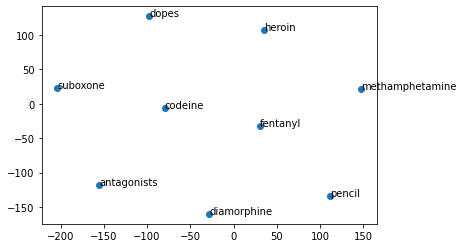

In [34]:
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(nearWords):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()